In [12]:
# svm 探究
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report
import pandas as pd
import data_util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = data_util.load_data()


# 需要合理的划分测试集选取k值 10%
train_x = train_x[:60000]
train_y = train_y[:60000]
test_x = test_x[:4000]
test_y = test_y[:4000]

In [2]:
%%time
# 简单测试rbf核的效果
param_c = 5
param_gamma = 0.05
model = svm.SVC(gamma=param_gamma,C=param_c,kernel='rbf')
model.fit(train_x,train_y)
y_predict= model.predict(test_x)
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       370
           1       0.98      0.97      0.98       450
           2       0.68      0.98      0.80       418
           3       0.88      0.93      0.90       408
           4       0.91      0.93      0.92       418
           5       0.95      0.90      0.93       372
           6       0.99      0.81      0.89       378
           7       0.97      0.85      0.91       411
           8       0.92      0.83      0.87       384
           9       0.91      0.86      0.88       391

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.92      0.90      0.90      4000
weighted avg       0.92      0.90      0.90      4000

Wall time: 1min 7s


In [13]:
# 通过聚类加快速度
from sklearn.decomposition import PCA,KernelPCA

pca = PCA(n_components=30)
pca.fit(train_x)
reduced_train_x = pca.transform(train_x)
reduced_test_x = pca.transform(test_x)

In [14]:
%%time
param_c = 5
param_gamma = 0.05
model = svm.SVC(gamma=param_gamma,C=param_c,kernel='rbf')

model.fit(reduced_train_x,train_y)
y_predict= model.predict(reduced_test_x)
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       370
           1       0.98      0.99      0.99       450
           2       0.97      0.99      0.98       418
           3       0.96      0.98      0.97       408
           4       0.98      0.98      0.98       418
           5       0.98      0.97      0.97       372
           6       0.98      0.97      0.97       378
           7       0.99      0.97      0.98       411
           8       0.97      0.97      0.97       384
           9       0.96      0.95      0.96       391

   micro avg       0.97      0.97      0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

Wall time: 1min 21s


In [5]:
# 发现通过聚类，不仅svm的速度有了极大地提升，其准确率也有了提高
# 下面分别控制变量，探究不同的核方法和pca维数对聚类效果的影响

Text(0.5, 0, 'reserved dim')

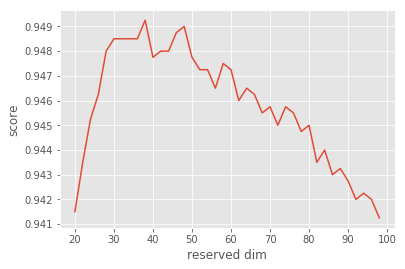

In [8]:
# 测试模型分类准确度和维度的关系
dim = np.arange(20,100,2)
scores = []
param_c = 5
param_gamma = 0.05
model = svm.SVC(gamma=param_gamma,C=param_c,kernel='rbf')
for d in dim:
    pca = PCA(n_components=d)
    pca.fit(train_x)
    reduced_train_x = pca.transform(train_x)
    reduced_test_x = pca.transform(test_x)
    model.fit(reduced_train_x, train_y)
    scores.append(model.score(reduced_test_x,test_y))
plt.style.use('ggplot')
plt.plot(dim,scores)
plt.ylabel("score")
plt.xlabel("reserved dim")

C:\Users\Snow\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Snow\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Snow\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 0, 'kernel')

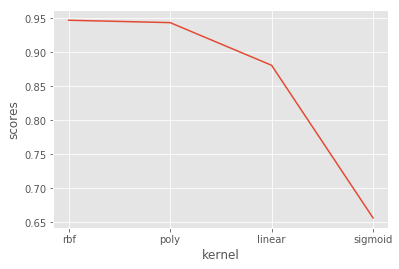

In [11]:
# 测试不同核方法对分类效果的影响
# 这里选 k = 30
pca = PCA(n_components=30)
pca.fit(train_x)
reduced_train_x = pca.transform(train_x)
reduced_test_x = pca.transform(test_x)
scores = []
kernel = ['rbf','poly','linear','sigmoid']
for item in kernel:
    model = svm.SVC(kernel=item)
    model.fit(reduced_train_x,train_y)
    scores.append(model.score(reduced_test_x,test_y))
plt.style.use('ggplot')
plt.plot(kernel,scores)
plt.ylabel('scores')
plt.xlabel('kernel')